In [1]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt
import trimesh
import skimage

In [2]:
final_phase_with_interference = np.load('final_phase_plate_square.npy')

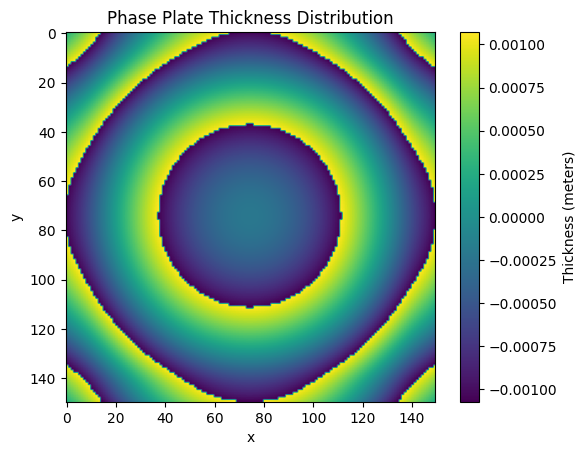

In [3]:
c = 3e8  # Speed of light in m/s
frequency = 200e9  # Frequency in Hz
wavelength = c / frequency

n = 1.7  # Refractive index of polyamide

# Calculate thickness distribution based on the final phase profile
thickness = (final_phase_with_interference * wavelength) / (2 * np.pi * (n - 1))

# Plot the thickness distribution
plt.imshow(thickness)
plt.title("Phase Plate Thickness Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Thickness (meters)")
plt.show()

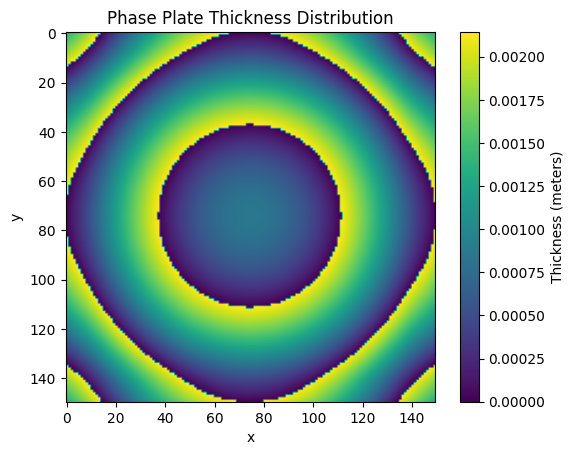

In [4]:
# Ensure all thickness values are non-negative
thickness -= np.min(thickness)

# thickness += 1e-3

# Plot the thickness distribution
plt.imshow(thickness)
plt.title("Phase Plate Thickness Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Thickness (meters)")
plt.show()

In [5]:
thickness += 2e-3

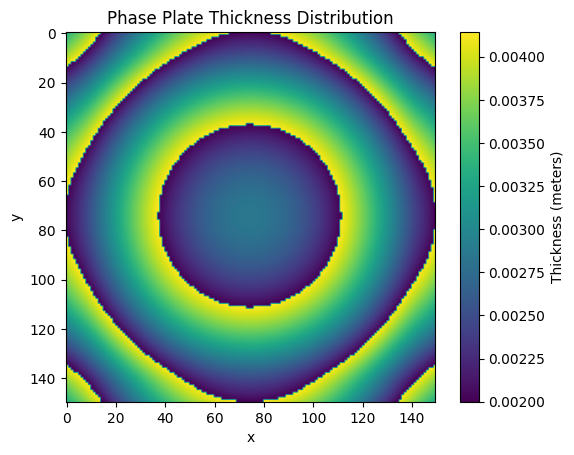

In [6]:
# Plot the thickness distribution
plt.imshow(thickness)
plt.title("Phase Plate Thickness Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Thickness (meters)")
plt.show()

In [7]:
print(thickness)

[[0.00338459 0.00343795 0.00348891 ... 0.00347022 0.00341616 0.00335796]
 [0.00343795 0.00349116 0.00354195 ... 0.00352354 0.00346961 0.00341147]
 [0.00348891 0.00354195 0.00359254 ... 0.00357445 0.00352067 0.00346265]
 ...
 [0.00347022 0.00352354 0.00357445 ... 0.00355552 0.00350149 0.00344328]
 [0.00341616 0.00346961 0.00352067 ... 0.00350149 0.00344737 0.00338913]
 [0.00335796 0.00341147 0.00346265 ... 0.00344328 0.00338913 0.00333091]]


In [8]:
x_target = 0.1 
y_target = 0.1  
z_resolution = 20 
z_max = np.max(thickness)

rows, cols = thickness.shape

x_norm = np.linspace(-0.5, 0.5, cols, endpoint=False)
y_norm = np.linspace(-0.5, 0.5, rows, endpoint=False)
z = np.linspace(0, z_max, z_resolution)

In [9]:
X, Y, Z = np.meshgrid(x_norm, y_norm, z, indexing="ij")

Z_mask = Z <= thickness[:, :, None]  # Broadcast thickness along z-axis

# Create a 3D boolean array for the voxel grid
voxel_data = Z_mask.astype(np.uint8)  # Convert boolean mask to binary (0, 1)

# Create a VoxelGrid
voxel_grid = trimesh.voxel.VoxelGrid(encoding=voxel_data, transform=np.eye(4))

mesh = voxel_grid.marching_cubes

scale_matrix = np.eye(4)
scale_matrix[0, 0] = 100 / cols  # Scale x-dimension to 100 mm
scale_matrix[1, 1] = 100 / rows  # Scale y-dimension to 100 mm
scale_matrix[2, 2] = z_max * 20     # Scale z-dimension to match thickness
mesh.apply_transform(scale_matrix)

<trimesh.Trimesh(vertices.shape=(70340, 3), faces.shape=(140676, 3))>

In [10]:
# Visualize the solid structure using trimesh
mesh.show()

In [11]:
mesh.export("phase_plate_tries_square.stl")
print("3D volumetric mask model exported as '3d_volumetric_mask_corrected.stl'")

3D volumetric mask model exported as '3d_volumetric_mask_corrected.stl'


## This is to Check the Code

In [19]:
import trimesh

# Load the STL file
model = trimesh.load("phase_plate_tries.stl")

# Check the dimensions
print(f"Model dimensions (x, y, z): {model.extents}")


Model dimensions (x, y, z): [100. 100.  10.]


In [20]:
# Check number of vertices and faces
print(f"Number of vertices: {mesh.vertices.shape[0]}")
print(f"Number of faces: {mesh.faces.shape[0]}")

# Check for invalid face indices
if np.max(mesh.faces) >= len(mesh.vertices):
    print("Error: Face indices reference non-existent vertices!")
else:
    print("All face indices are valid.")



Number of vertices: 26858
Number of faces: 53720
All face indices are valid.
